In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
X=df.drop(columns=['math_score'],axis=1)

In [4]:
y=df['math_score']

In [5]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(exclude='object').columns

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 151), (200, 151))

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7.8301
- Mean Absolute Error: 6.2872
- R2 Score: 0.7280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.7757
- Mean Absolute Error: 7.9516
- R2 Score: 0.6073


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.6808
- Mean Absolute Error: 6.9821
- R2 Score: 0.6658
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8751
- Mean Absolute Error: 7.3635
- R2 Score: 0.6763


Ridge
Model performance for Training set
- Root Mean Squared Error: 7.8737
- Mean Absolute Error: 6.3800
- R2 Score: 0.7250
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.3038
- Mean Absolute Error: 7.6834
- R2 Score: 0.6443


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.4927
- Mean Absolute Error: 6.0245
- R2 Score: 0.7510
-----------------------

In [11]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.676304
7,AdaBoost Regressor,0.673191
2,Ridge,0.644280
0,Linear Regression,0.607276
3,K-Neighbors Regressor,0.592625
5,Random Forest Regressor,0.562536
6,XGBRegressor,0.537276
4,Decision Tree,0.410564


In [12]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 60.73


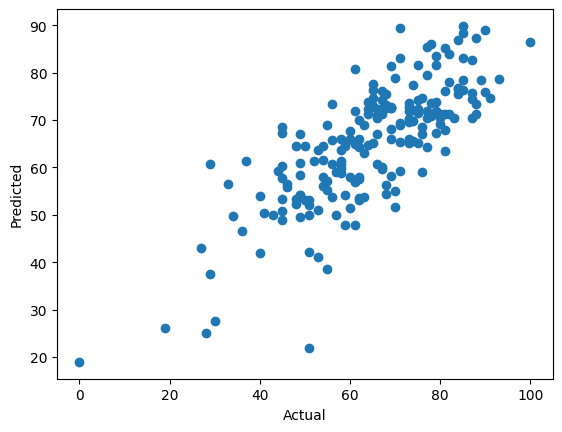

In [13]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

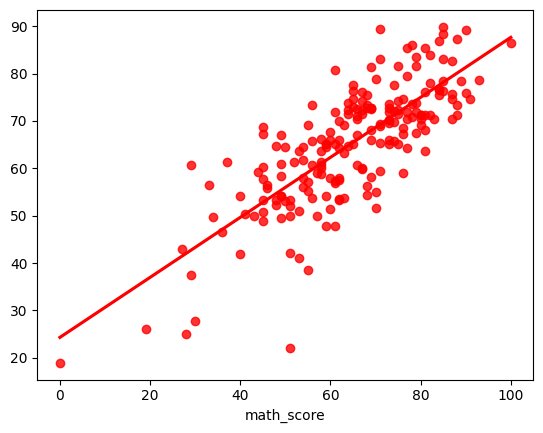

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,74.631496,16.368504
737,53,63.609891,-10.609891
740,80,70.367917,9.632083
660,74,69.817012,4.182988
411,84,75.491992,8.508008
...,...,...,...
408,52,61.257017,-9.257017
332,62,53.202379,8.797621
208,74,77.496735,-3.496735
613,65,72.962823,-7.962823
